In [ ]:
! pip install dice_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import dice_ml
from dice_ml.utils import helpers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('dataset_all_features.csv')

In [ ]:
data.shape

(176, 35)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(159, 35)

In [ ]:
data.head()

,fasting_glucose,recent_cgm,lunch_time,work_at_home,recent_activity,bmi,Calories,Calories From Fat,Total Fat (g),Saturated Fat (g),...,stepping_total,sitting_at_work,standing_at_work,stepping_at_work,work_start_time,glycemic_load,absolute_auc,respective_auc,max_postprandial_gluc,postprandial_hyperglycemia_140
0,48,58.062500,12.25,1,10.0,36.7,350.0,100.000000,12.0,2.000000,...,380.1,16843.600003,132.2,124.2,7.500000,14.764100,287.759823,86.759823,115.0,0.0
1,46,58.107143,12.50,1,7.5,36.7,1120.0,415.000000,45.5,15.000000,...,509.5,16113.400000,448.4,358.0,7.500000,26.325000,261.998615,60.998615,110.0,0.0
2,56,58.750000,12.00,1,7.5,36.7,440.0,166.666667,18.0,3.333333,...,450.6,14463.200004,622.6,214.2,7.750000,35.154444,242.771572,41.771572,97.0,0.0
4,63,64.687500,14.50,0,22.5,36.7,570.0,280.000000,31.0,12.000000,...,2158.7,15358.299999,4302.0,1890.1,7.833333,27.710000,272.283582,122.283582,118.0,0.0
5,71,72.250000,12.75,0,30.0,36.7,660.0,170.000000,21.0,3.500000,...,1579.7,10374.899996,4505.4,1249.2,8.250000,27.660000,308.404090,158.404090,126.0,0.0


In [ ]:
data.columns

Index(['fasting_glucose', 'recent_cgm', 'lunch_time', 'work_at_home',
       'recent_activity', 'bmi', 'Calories', 'Calories From Fat',
       'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
       'Cholesterol (mg)', 'Sodium (mg)', 'Total Carbs (g)', 'Fiber (g)',
       'Sugars (g)', 'Net Carbs(g)', 'Protein (g)', 'is_Friday', 'is_Monday',
       'is_Thursday', 'is_Tuesday', 'is_Wednesday', 'sitting_total',
       'standing_total', 'stepping_total', 'sitting_at_work',
       'standing_at_work', 'stepping_at_work', 'work_start_time',
       'glycemic_load', 'absolute_auc', 'respective_auc',
       'max_postprandial_gluc', 'postprandial_hyperglycemia_140'],
      dtype='object')

In [ ]:
data = data.drop(columns=['absolute_auc','respective_auc','max_postprandial_gluc'])

In [ ]:
# Split dataset
X = data.drop('postprandial_hyperglycemia_140', axis=1).astype(float)
y = data['postprandial_hyperglycemia_140'].astype(int)


In [ ]:
# balance X_train, y_train with AdaSYN
from imblearn.over_sampling import ADASYN
# augment training data to a size 5 times bigger

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Build a random forest
def train_and_test(X, y, repeat):

  rfs = []
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  for i in range(repeat):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42*i)
    X_train.to_csv(f'X_train_{i}.csv', index=False)
    X_test.to_csv(f'X_test_{i}.csv', index=False)
    y_train.to_csv(f'y_train_{i}.csv', index=False)
    y_test.to_csv(f'y_test_{i}.csv', index=False)

    adasyn = ADASYN(random_state=42*i)
    X_train, y_train = adasyn.fit_resample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators=100, random_state=42*i)
    rf.fit(X_train, y_train)
    # evaluate the RF model
    y_pred = rf.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred), 'Precision:', precision_score(y_test, y_pred), 'Recall:', recall_score(y_test, y_pred), 'F1:', f1_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    rfs.append(rf)


  return rfs, accuracy_scores, precision_scores, recall_scores, f1_scores


In [ ]:
rfs, accs, precs, recs, f1s = train_and_test(X, y, 5)

Accuracy: 0.78125 Precision: 0.5833333333333334 Recall: 0.7777777777777778 F1: 0.6666666666666666
Accuracy: 0.78125 Precision: 0.75 Recall: 0.5454545454545454 F1: 0.631578947368421
Accuracy: 0.65625 Precision: 0.42857142857142855 Recall: 0.3 F1: 0.35294117647058826
Accuracy: 0.78125 Precision: 0.8571428571428571 Recall: 0.5 F1: 0.631578947368421
Accuracy: 0.71875 Precision: 0.5714285714285714 Recall: 0.4 F1: 0.47058823529411764


In [ ]:
np.array(accs).mean(), np.array(precs).mean(), np.array(recs).mean(), np.array(f1s).mean()

(0.74375, 0.6380952380952382, 0.5046464646464647, 0.550670794633643)

In [ ]:
model = rfs[0]

In [ ]:
X_train, X_test, y_train, y_test = pd.read_csv('X_train_0.csv'), pd.read_csv('X_test_0.csv'), pd.read_csv('y_train_0.csv'), pd.read_csv('y_test_0.csv')

In [ ]:
continuous_features = []
for col in data.columns:
  #if col not in ['postprandial_hyperglycemia_140', 'work_at_home'] and col[:3] != 'is_':
  if col != 'postprandial_hyperglycemia_140':
    continuous_features.append(col)

In [ ]:
continuous_features

['fasting_glucose',
 'recent_cgm',
 'lunch_time',
 'work_at_home',
 'recent_activity',
 'bmi',
 'Calories',
 'Calories From Fat',
 'Total Fat (g)',
 'Saturated Fat (g)',
 'Trans Fat (g)',
 'Cholesterol (mg)',
 'Sodium (mg)',
 'Total Carbs (g)',
 'Fiber (g)',
 'Sugars (g)',
 'Net Carbs(g)',
 'Protein (g)',
 'is_Friday',
 'is_Monday',
 'is_Thursday',
 'is_Tuesday',
 'is_Wednesday',
 'sitting_total',
 'standing_total',
 'stepping_total',
 'sitting_at_work',
 'standing_at_work',
 'stepping_at_work',
 'work_start_time',
 'glycemic_load']

In [ ]:
# Convert the model into a dice-ml compatible format
dice_model = dice_ml.Model(model=model, backend='sklearn')  # sklearn backend
data_interface = dice_ml.Data(dataframe=pd.concat([pd.DataFrame(X), y], axis=1),
                              continuous_features=continuous_features,
                              outcome_name='postprandial_hyperglycemia_140')

# Create DiCE object
explainer = dice_ml.Dice(data_interface, dice_model)



In [ ]:
def print_vectors(vectors, X, indices_where_change):
  df = pd.DataFrame(vectors, columns=X.columns[indices_where_change])
  display(df)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_counterfactuals(query_simple, cf_simple, X, indices_where_change, test_label, rotation=0):

  # plot the original and the counterfactuals vectors.

  plt.figure(figsize=(6, 6))
  indices = np.arange(len(query_simple))
  xticks = [X.columns[i] for i in indices_where_change]
  scales = [1] * len(indices_where_change)

  # divide every continuous feature by the maximum value for that feature
  query_np = np.array(query_simple).reshape(1, -1).astype(float)
  cf_np = np.array(cf_simple).reshape(len(cf_simple), -1).astype(float)
  combined_np = np.concatenate((query_np, cf_np), axis=0)


  for i in range(len(indices_where_change)):
    max_value = combined_np[:,i].max()
    if max_value != 0 and max_value != 1:
      scales[i] = max_value
      query_np[0, i] = query_np[0, i] / max_value
      cf_np[:, i] = cf_np[:, i] / max_value
      xticks[i] = xticks[i] + f'\nx {scales[i]}'


  # thick border
  plt.rcParams['axes.linewidth'] = 4

  plt.plot(query_np[0, :], label=f'Original (Outcome:{test_label})', linewidth = 4, marker='o', markersize=10)
  for i in range(len(cf_np)):
    plt.plot(indices, cf_np[i, :]+0.01*(i+1), label=f'Counterfactual {i+1} (Outcome:{1-test_label})', linewidth = 4, marker='^', linestyle='--', markersize=10)

  plt.xlabel('Features', fontsize = 16)
  plt.ylabel('Values', fontsize = 16)
  plt.xticks(indices, labels = xticks, rotation = rotation)
  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.ylim(bottom=0)
  plt.title('Original and Counterfactual Examples (CF features shifted by small amount (0.01-0.03) for better visualization)')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def print_counterfactuals(query_vector, cf_vectors, X, test_label):

  indices_where_change = []
  for i in range(len(query_vector[0])):
    for j in range(len(cf_vectors)):
      if query_vector[0][i] != cf_vectors[j][i]:
        indices_where_change.append(i)
        break

  print('Features changed are:', X.columns[indices_where_change].tolist())
  query_simple = query_vector[0][indices_where_change]

  print(f'Original (outcome: {test_label})')
  print_vectors(np.array(query_simple).reshape(1,-1), X, indices_where_change)

  cf_simple = [cf[indices_where_change] for cf in cf_vectors]
  print(f'{len(cf_simple)} counterfactuals (outcome: {1-test_label})')

  print_vectors(np.array(cf_simple).reshape(len(cf_simple), -1), X, indices_where_change)

  plot_counterfactuals(query_simple, cf_simple, X, indices_where_change, test_label)

  return query_simple, cf_simple, indices_where_change,





In [ ]:
temp_query = None
temp_cf = None,
temp_indices = None
temp_label = None

In [ ]:
def generate_and_print_counterfactuals(test_row, X, test_label):
  query_df = test_row.reshape(1,-1).astype(int)
  query_df = pd.DataFrame(query_df, columns=X.columns)
  counterfactuals = explainer.generate_counterfactuals(query_df,
                                                     total_CFs=3,
                                                     desired_class="opposite")
  cf_vectors = counterfactuals.cf_examples_list[0].final_cfs_df.values[:,:-1] # remove the outcome column.
  query_vector = query_df.values
  temp_query, temp_cf, temp_indices = print_counterfactuals(query_vector, cf_vectors, X, test_label)
  return temp_query, temp_cf, temp_indices, test_label

100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

Features changed are: ['Cholesterol (mg)', 'Fiber (g)', 'stepping_total']
Original (outcome: 1)


,Cholesterol (mg),Fiber (g),stepping_total
0,50,1,537


3 counterfactuals (outcome: 0)


,Cholesterol (mg),Fiber (g),stepping_total
0,50,5,537
1,106,9,537
2,50,1,2363


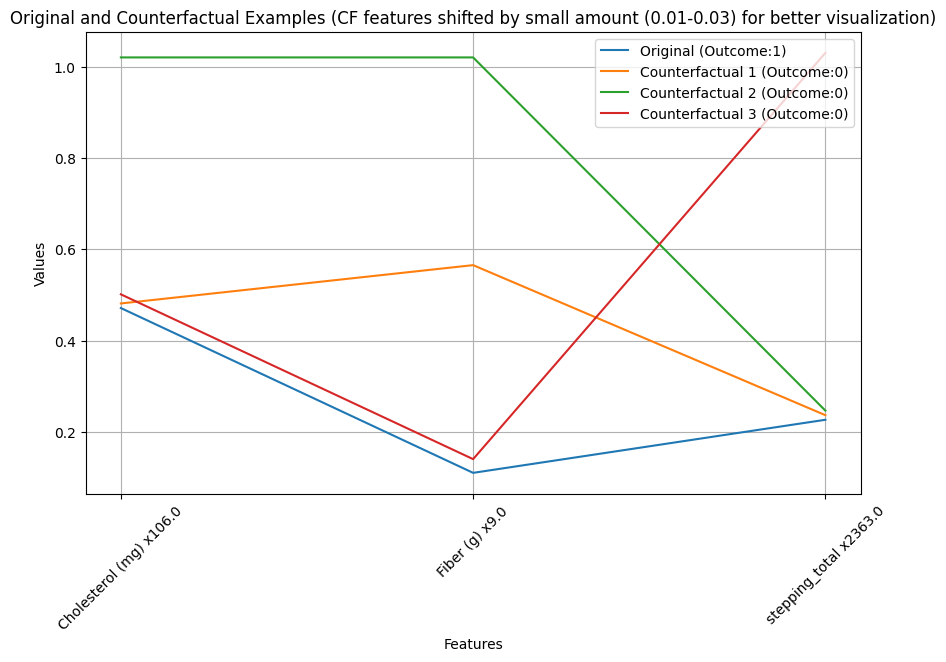

In [ ]:
temp_query, temp_cf, temp_indices, temp_label = generate_and_print_counterfactuals(X_test.iloc[0].values, X, y_test.iloc[0].values[0])

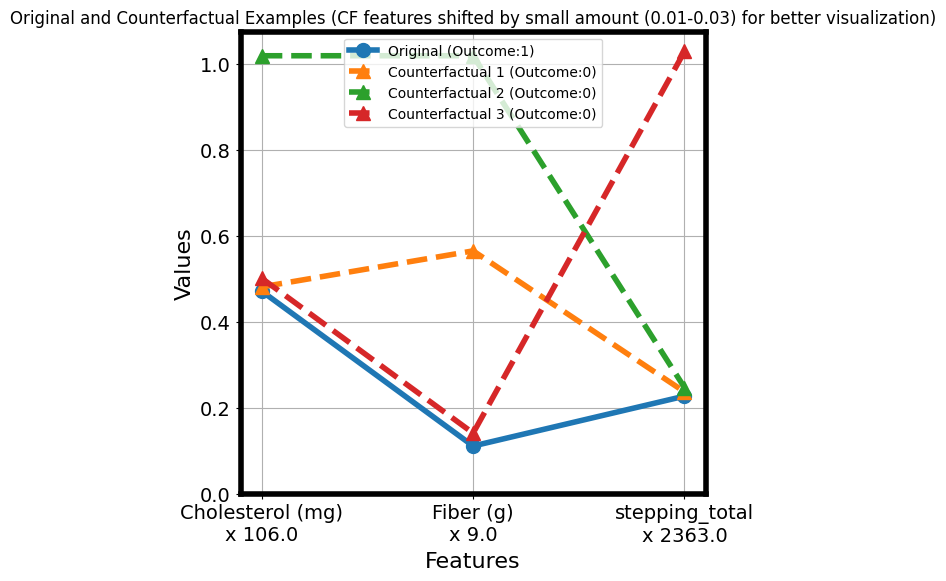

In [ ]:
plot_counterfactuals(temp_query, temp_cf, X, temp_indices, temp_label)

In [ ]:
print(temp_query, temp_cf, temp_indices, temp_label)

[ 50   1 537] [array([ 50,   5, 537]), array([106,   9, 537]), array([  50,    1, 2363])] [11, 14, 25] 1


In [ ]:
X_test.iloc[0]

,0
fasting_glucose,75.000000
recent_cgm,79.468750
lunch_time,13.000000
work_at_home,1.000000
recent_activity,20.000000
bmi,36.700000
Calories,620.000000
Calories From Fat,130.000000
Total Fat (g),14.000000
Saturated Fat (g),2.500000


In [ ]:
y_test.iloc[0].values[0]

1

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

Features changed are: ['fasting_glucose', 'recent_cgm', 'lunch_time', 'Calories', 'Total Carbs (g)', 'sitting_at_work', 'work_start_time']
Original (outcome: 0)


,fasting_glucose,recent_cgm,lunch_time,Calories,Total Carbs (g),sitting_at_work,work_start_time
0,87,90,13,780,86,2899,11


3 counterfactuals (outcome: 1)


,fasting_glucose,recent_cgm,lunch_time,Calories,Total Carbs (g),sitting_at_work,work_start_time
0,87,90,12,826,86,8917,6
1,95,130,13,1217,77,17295,11
2,95,130,13,1217,86,17295,11


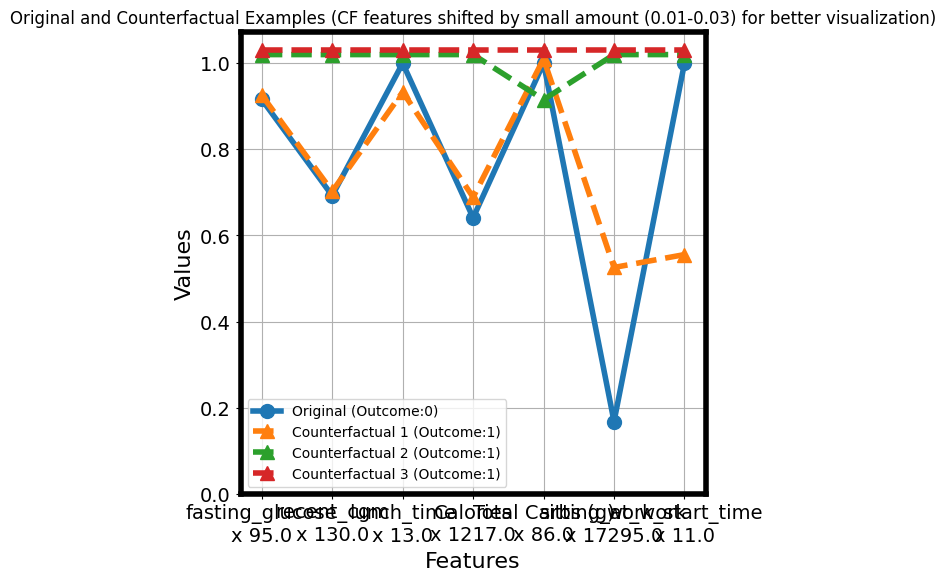

In [ ]:
temp_query2, temp_cf2, temp_indices2, temp_label2 = generate_and_print_counterfactuals(X_test.iloc[1].values, X, y_test.iloc[1].values[0])

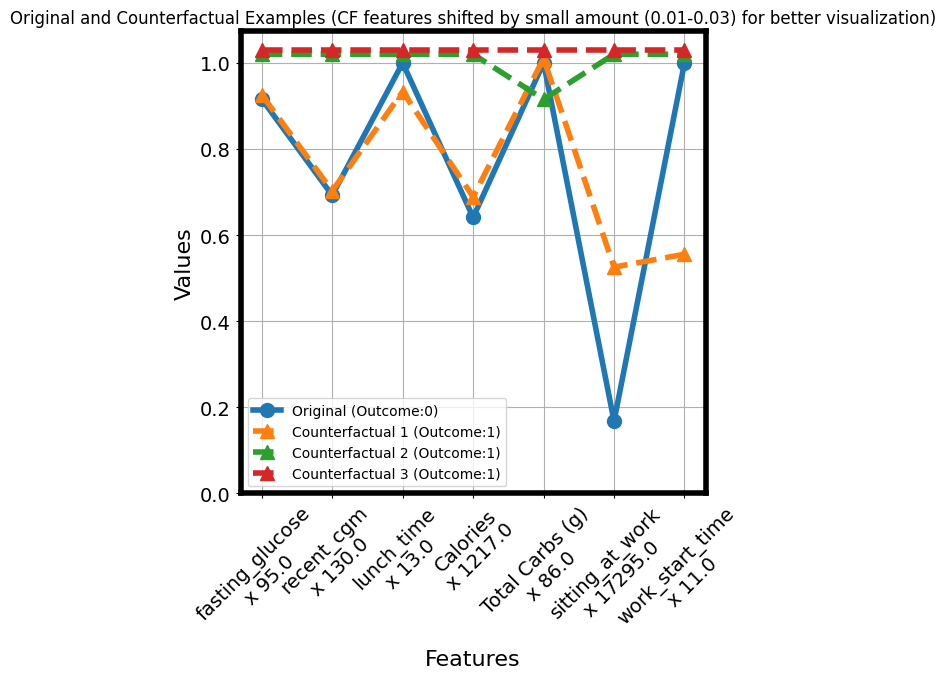

In [ ]:
plot_counterfactuals(temp_query2, temp_cf2, X, temp_indices2, temp_label2, rotation=45)

In [ ]:
print(temp_query2, temp_cf2, temp_indices2, temp_label2)

[  87   90   13  780   86 2899   11] [array([  87,   90,   12,  826,   86, 8917,    6]), array([   95,   130,    13,  1217,    77, 17295,    11]), array([   95,   130,    13,  1217,    86, 17295,    11])] [0, 1, 2, 6, 13, 26, 29] 0


In [ ]:
X_test.iloc[1]

,1
fasting_glucose,87.000000
recent_cgm,90.562500
lunch_time,13.500000
work_at_home,0.000000
recent_activity,37.500000
bmi,36.200000
Calories,780.000000
Calories From Fat,380.000000
Total Fat (g),43.000000
Saturated Fat (g),5.000000


In [ ]:
y_test.iloc[1].values[0]

0